In [3]:
import pandas as pd

In [4]:
titanic=pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic=titanic.dropna()
#dropping female if its 0 means female 1 thean male if i dropped male then 0=male 1=female
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex

,male
1,0
3,0
6,1
10,0
11,0
...,...
871,0
872,1
879,0
887,0


In [6]:
#now embarked but it has 3 outcomes so so we take 2 if both are 0 0 then means answer is third one we dropped
Embarked=pd.get_dummies(titanic['Embarked'],drop_first=True)
Embarked

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1
...,...,...
871,0,1
872,0,1
879,0,0
887,0,1


In [7]:
titanicdata=pd.concat([titanic,sex,Embarked],axis=1)
titanicdata.drop(['Sex','Embarked'],axis=1)#axis=1 is important to feed that drop tthe column SEX

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,D35,0,0,1
872,873,0,1,"Carlsson, Mr. Frans Olof",33.0,0,0,695,5.0000,B51 B53 B55,1,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C50,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1


In [27]:
#First we have to select dependent and independent 
feature_col=['male','Age','Q','S','PassengerId','Pclass','SibSp','Parch']
x=titanicdata[feature_col]
y=titanicdata.Survived

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
#pruning is actually removing unwanted branches from tree 
#ccp_alpha is the instance we use in our classifier teh defualt value is 0.0 but when u give value > 0 it will pru

In [29]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=5)
cls.fit(x_train,y_train) 

KNeighborsClassifier()

In [30]:
y_pred=cls.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [31]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 5,  4],
       [ 6, 31]], dtype=int64)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))# recall is the measure of our model correctly identifying True Positives.k

Accuracy: 0.782608695652174
Precision: 0.8857142857142857
Recall: 0.8378378378378378


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

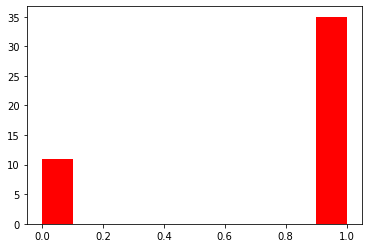

In [39]:
plt.hist(y_pred,color='red')

<AxesSubplot:xlabel='Survived'>

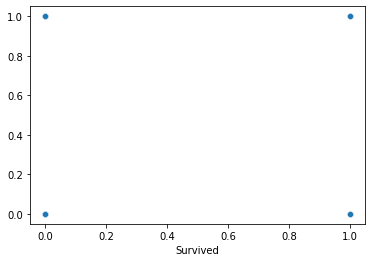

In [37]:
sns.scatterplot(x=y_test,y=y_pred)

<AxesSubplot:>

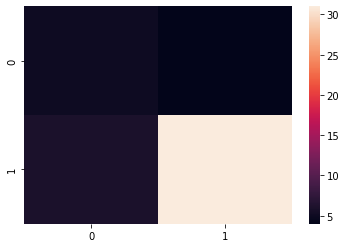

In [40]:
sns.heatmap(cnf_matrix)